In [22]:
#importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv("pp-2018_alma.csv",
              names =["TID","Price","sale Date","Postcode",
                     "Property Type","New Build","Tenure","PAON","SAON"
                     ,"Street","Locality","Town/city","District","Country","PPD Category","Records Status"],parse_dates=["sale Date"])

In [9]:
df.head(2)

,TID,Price,sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/city,District,Country,PPD Category,Records Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A


In [12]:
df.columns

Index(['TID', 'Price', 'sale Date', 'Postcode', 'Property Type', 'New Build',
       'Tenure', 'PAON', 'SAON', 'Street', 'Locality', 'Town/city', 'District',
       'Country', 'PPD Category', 'Records Status'],
      dtype='object')

In [11]:
df.shape

(1024432, 16)

In [15]:
# now qw will filter the data to get all the transcations for a particular  year and  month 
#select only record type A and propert type not "O"
df=df.loc[df['Records Status']=="A"]
df=df.loc[df['Property Type']!="O"]

In [17]:
#select transcation for 2018
df=df[(df['sale Date'].dt.year==2018)]

In [18]:
df.shape

(959003, 16)

In [19]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [23]:
#first objective :obtain the trend  of sales vloume across months
from datetime import datetime

In [24]:
"2018-01-25"[:7]

'2018-01'

In [25]:
# create a variable month to denote the transcation month
df['month']=df['sale Date'].apply(lambda x: x.strftime("%Y_%m_%d")[:7])

In [27]:
df.head(3 )

,TID,Price,sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/city,District,Country,PPD Category,Records Status,month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018_01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018_01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018_01


In [30]:
mon_sal =df["month"].value_counts()

In [31]:
print(mon_sal)

2018_08    95382
2018_11    92427
2018_06    90178
2018_10    86892
2018_07    83082
2018_12    79754
2018_03    78070
2018_09    77836
2018_05    76325
2018_04    67094
2018_02    66959
2018_01    65004
Name: month, dtype: int64


In [32]:
type(mon_sal)

pandas.core.series.Series

In [33]:
mon_sal.sort_index(inplace=True) 

In [34]:
mon_sal

2018_01    65004
2018_02    66959
2018_03    78070
2018_04    67094
2018_05    76325
2018_06    90178
2018_07    83082
2018_08    95382
2018_09    77836
2018_10    86892
2018_11    92427
2018_12    79754
Name: month, dtype: int64

Text(0.5, 1.0, 'Monthly sales in 2018')

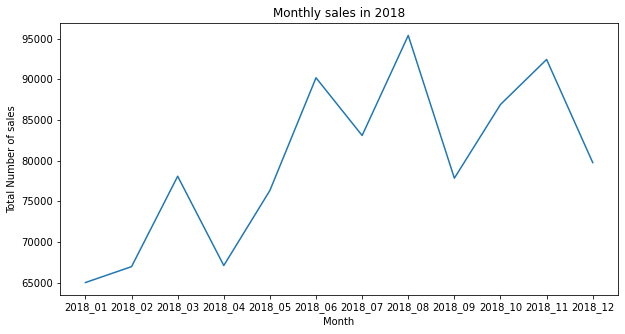

In [42]:
plt.rcParams['figure.figsize']=(10,5)
#create the object to plot
plt.plot(mon_sal)
plt.xlabel("Month")
plt.ylabel("Total Number of sales")
plt.title("Monthly sales in 2018")

In [43]:
#objective @: observe the daily sales volume in the month of july
# daily sales volume for july 2018
df =df[df["sale Date"].dt.month==7]
total_sales =df["sale Date"].value_counts()

In [44]:
total_sales

2018-07-27    11145
2018-07-20     8802
2018-07-06     8400
2018-07-13     6561
2018-07-31     5047
2018-07-12     3568
2018-07-30     3429
2018-07-26     2965
2018-07-02     2931
2018-07-16     2883
2018-07-23     2742
2018-07-25     2710
2018-07-19     2571
2018-07-18     2438
2018-07-05     2358
2018-07-09     2259
2018-07-11     2165
2018-07-24     2116
2018-07-04     2064
2018-07-10     1985
2018-07-17     1933
2018-07-03     1828
2018-07-28       31
2018-07-14       25
2018-07-29       25
2018-07-21       21
2018-07-15       20
2018-07-07       18
2018-07-01       18
2018-07-22       13
2018-07-08       11
Name: sale Date, dtype: int64

In [47]:
total_sales.sort_index(inplace=True) 

Text(0.5, 1.0, 'sales of month of july in 2018')

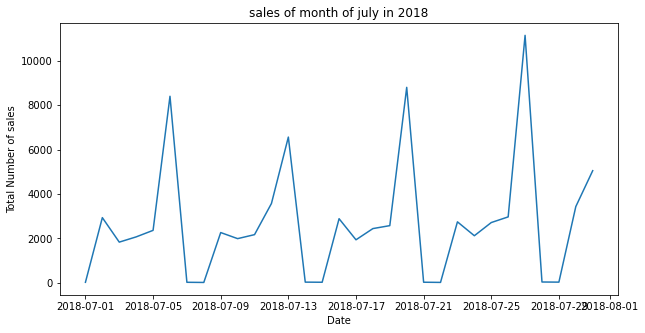

In [55]:
plt.rcParams['figure.figsize']=(10,5)
#create the object to plot
plt.plot(total_sales)
plt.xlabel("Date")
plt.ylabel("Total Number of sales")
plt.title("sales of month of july in 2018")

In [51]:
df.unstack?

In [56]:
daily_price = df.groupby(['sale Date','Property Type'])['sale Date'].count().unstack()

In [57]:
daily_price

Property Type,D,F,S,T
sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 1.0, 'Average Daily sales of different property types in the month of july  2018')

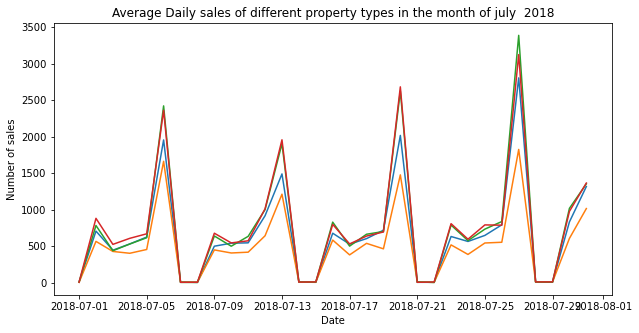

In [60]:
plt.plot(daily_price)
plt.xlabel("Date")
plt.ylabel(
    "Number of sales")
plt.title("Average Daily sales of different property types in the month of july  2018")

In [62]:
# creating a bar chart
#number of residental property transactions in Aug 2018 by propert type
sales_by_type =df["Property Type"].value_counts()

In [63]:
sales_by_type


T    23630
S    23501
D    20406
F    15545
Name: Property Type, dtype: int64

Text(0.5, 1.0, 'A sales of different property types   2018')

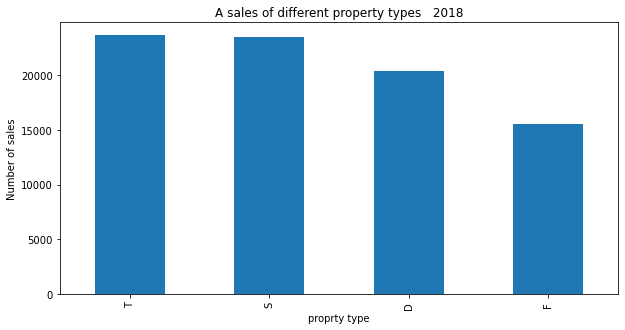

In [67]:
sales_by_type.plot(kind="bar")
plt.xlabel("proprty type")
plt.ylabel(
    "Number of sales")
plt.title("A sales of different property types   2018")

In [ ]:
# fourth observation


In [68]:
#average house price for different property types in july
avg_price = df.groupby(['Property Type'])['Price'].mean()

In [69]:
avg_price

Property Type
D    420870.312359
F    306578.147507
S    260353.586613
T    248855.367203
Name: Price, dtype: float64

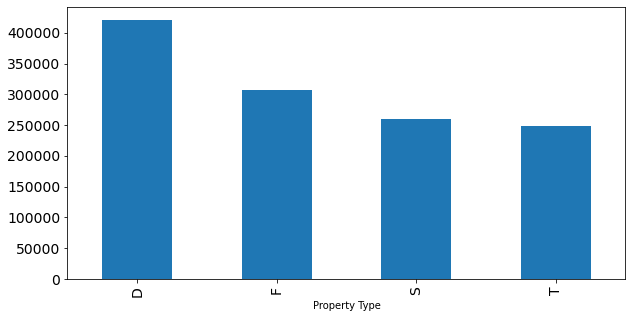

In [70]:
ax=avg_price.plot.bar(figsize=(10,5),fontsize=14)

In [72]:
df.describe()

,Price
count,8.308200e+04
mean,3.051571e+05
std,3.309047e+05
min,1.000000e+00
25%,1.520000e+05
50%,2.350000e+05
75%,3.630000e+05
max,2.121000e+07


In [73]:
#box plot
df_box=df.groupby(['sale Date','Property Type'])['sale Date'].count().unstack()

Text(0.5, 0, 'Property Type')

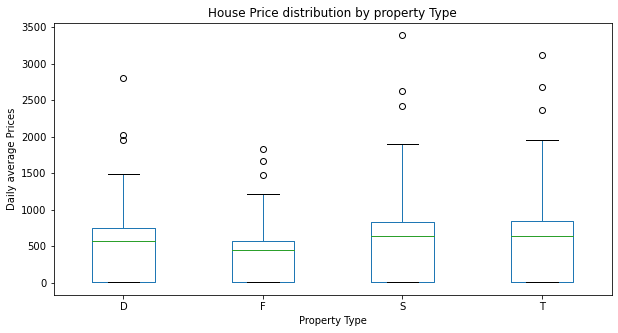

In [75]:
df_box.plot(kind="box")
plt.title('House Price distribution by property Type')
plt.ylabel('Daily average Prices')
plt.xlabel('Property Type')